## Imports

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras

from scipy.io import loadmat
import keras.layers as l
import keras.backend as K
# import keras.callbacks.callbacks.EarlyStopping

import keras.optimizers as o
import keras.models as m
from keras.utils import to_categorical

## Load the dataset

x data shape:  (73257, 32, 32, 3)


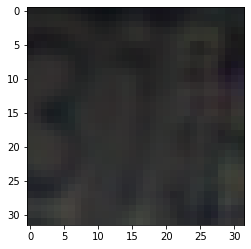

In [3]:
SVHN_directory = os.path.join("SVHN_dataset", "train_32x32.mat")

# load .mat file
data_raw = loadmat(SVHN_directory)
data = np.array(data_raw['X'])

# make correct shape
data = np.moveaxis(data, -1, 0)

# normalize
data = keras.utils.normalize(data, axis=1)

print("x data shape: ", data.shape)
plt.imshow(data[9])

## Loading and fixing the Labels

In [4]:
labels = data_raw['y']

# fixing zeros to be label 0
labels[labels == 10] = 0

# to categorical
labels = to_categorical(labels.reshape([-1, 1]))


print("y label shape: ", labels.shape)

y label shape:  (73257, 10)


In [5]:
# validation data: 7326 random images from train
import random

my_seed = int(10*random.random())
random.Random(my_seed).shuffle(data)
random.Random(my_seed).shuffle(labels)

val_data, val_labels = data[:7326], labels[:7326]
print(val_data.shape)

(7326, 32, 32, 3)


## Make the requested model

In [8]:
model = m.Sequential()

model.add(l.Conv2D(9, (3,3), padding='same', activation='relu', input_shape = (32, 32, 3)))
model.add(l.MaxPooling2D((3,3)))

model.add(l.Conv2D(36, (3,3), padding='same', activation='relu'))
model.add(l.MaxPooling2D((3,3)))

model.add(l.Conv2D(49, (3,3), padding='same', activation='relu'))
model.add(l.MaxPooling2D((3,3)))

model.add(l.Flatten()) 
model.add(l.Dense(10, activation='softmax')) ## edw μαλλον dn 8elei 1

model.compile(
    optimizer=o.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 9)         252       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 9)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 36)        2952      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 36)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 49)          15925     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 49)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 49)               

In [9]:
from keras.callbacks.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

model.fit(data, labels, epochs=4, callbacks=[es], validation_data=(val_data, val_labels))

Train on 73257 samples, validate on 7326 samples
Epoch 1/4
73257/73257 [==============================] - 21s 283us/step - loss: 1.5792 - accuracy: 0.4618 - val_loss: 1.0589 - val_accuracy: 0.6601
Epoch 2/4
73257/73257 [==============================] - 20s 274us/step - loss: 0.9541 - accuracy: 0.7026 - val_loss: 0.8217 - val_accuracy: 0.7443
Epoch 3/4
73257/73257 [==============================] - 21s 282us/step - loss: 0.7890 - accuracy: 0.7591 - val_loss: 0.6687 - val_accuracy: 0.7974
Epoch 4/4
73257/73257 [==============================] - 20s 280us/step - loss: 0.6945 - accuracy: 0.7879 - val_loss: 0.5621 - val_accuracy: 0.8265


## Predict - Evaluate - Confussion Matrix

In [48]:
predictions = model.predict([val_data])

In [50]:
from sklearn.metrics import confusion_matrix

real_results = []
predictive_results = []
for i in range(len(val_labels)):
    real_results.append(np.argmax(val_labels[i]))
    predictive_results.append(np.argmax(predictions[i]))

print(confusion_matrix(real_results, predictive_results, labels=[0,1,2,3,4,5,6,7,8,9]))

[[ 434   33    8    6    3    3    1    0    9    3]
 [   4 1385   11   19   35    5    2    4   21    3]
 [   0   48  863   30   32    1    9    2   22    6]
 [   9   44   13  714   16   32    4    1   17    4]
 [   4   37    6   15  738    6    3    0    5    2]
 [   0   14    3   89   18  546   26    0   36    4]
 [   4   20    3   22   20   28  331    0   64    1]
 [   0   53   20   26    1    6    0  352    3    1]
 [   4   25   12   19   21    5   12    1  421    9]
 [  20   25    4   15   16   17    0    0   50  287]]
